In [26]:
%pip install wfdb
%pip install numba
%pip install xlrd 
%pip install os 

import numba
import os
import numpy as np
import matplotlib.pyplot as plt
import wfdb # read Physionet/picsdb file format
import xlrd
from scipy.signal import welch, butter, filtfilt
from wfdb import processing
from numba import jit

data_dir = "E:\\WOA7015\\WOA7015-EDA\\picsdb_data\\1.0.0"

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: http://mirrors.aliyun.com/pypi/simple/Note: you may need to restart the kernel to use updated packages.

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [27]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

C:\Users\Flynn\AppData\Local\Temp\ipykernel_38724\1579911751.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
C:\Users\Flynn\AppData\Local\Temp\ipykernel_38724\1579911751.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',


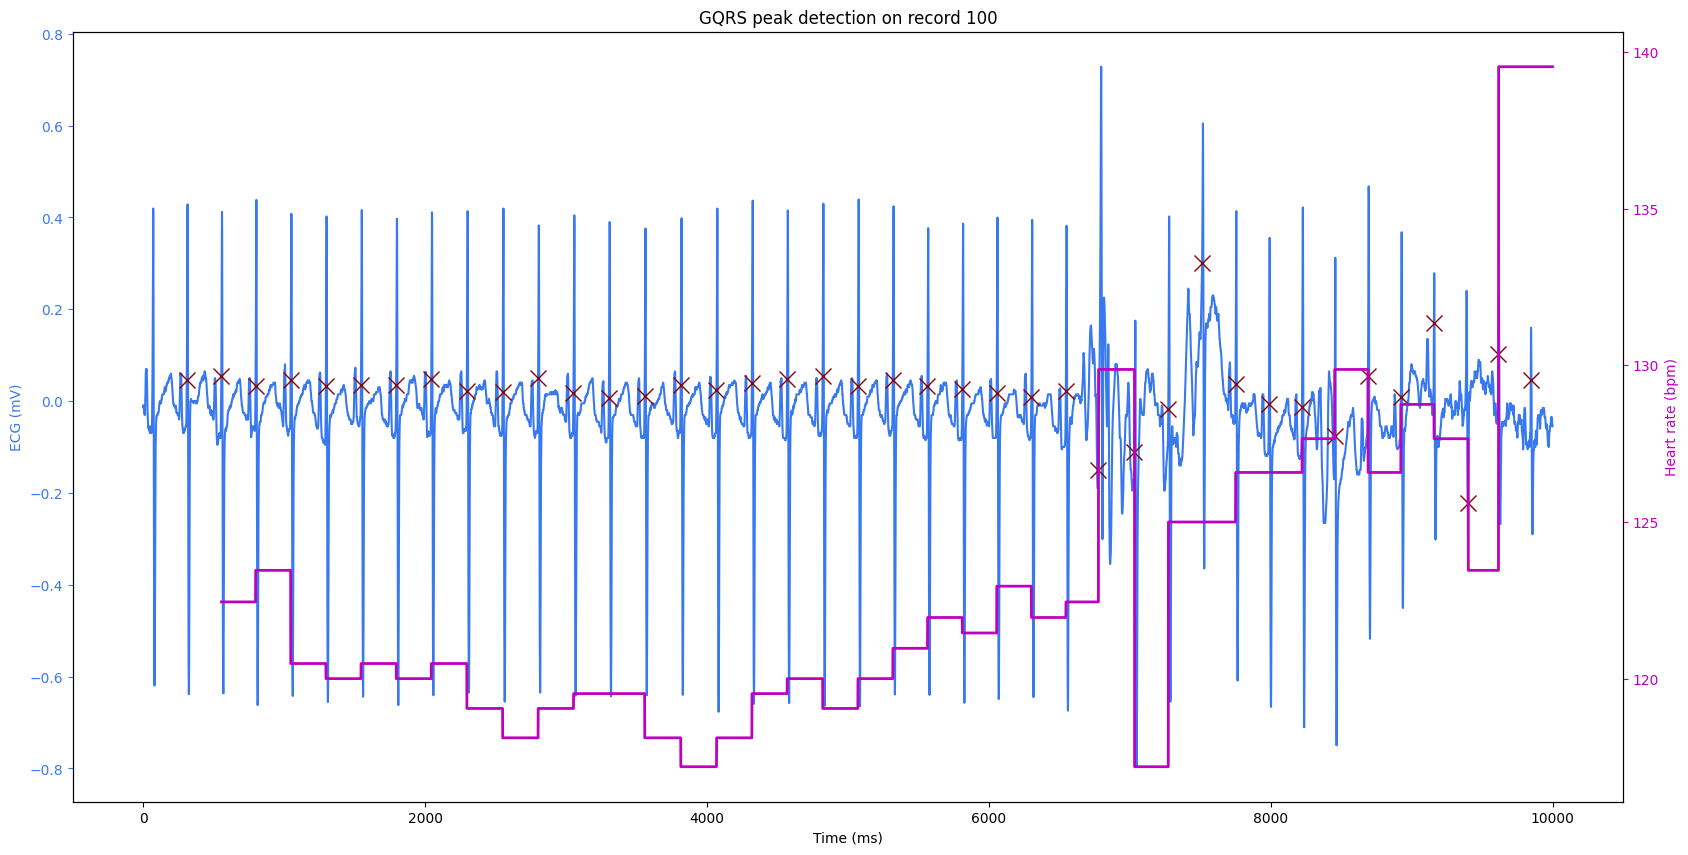

In [28]:
 # ECG PLOT
#ecg_records = [] # ecg records list
#ecg_subsample_duration = 500
## ecg_record_1 = wfdb.rdsamp(f"{data_dir}/infant1_ecg")
# f = plt.figure(1)
# f.set_figwidth(20)
# f.set_figheight(10)
# plt.plot(ecg_record_1[0][:500])
# plt.show()
# Load the WFDB record and the physical samples
record = wfdb.rdrecord(f"{data_dir}/infant2_ecg", sampfrom=0, sampto=10000, channels=[0])


display(record.__dict__)

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    